---
# <<<< Financiamiento Privado en Mercado de Capitales >>>> 
---

In [1]:
# Comenzamos importando las librerias a utilizar por el momento.

import numpy as np   # Importamos librerias de calculo
import pandas as pd  # Importamos librerias de uso de tablas o los dataframes
import seaborn as sns # Importamos librerias de graficos
%matplotlib inline
import matplotlib.pyplot as plt

Direccion del dataset

https://datos.gob.ar/dataset/sspm-financiamiento-privado-mercado-capitales/archivo/sspm_170.1

In [2]:
# Ubicar el dataset, cargarlo y mostrarlo.
url='https://raw.githubusercontent.com/NestorDiazDataSC/Analisis_de_Datos/main/Financiamiento_Privado_Mercado_Capitales/financiamiento-privado-mercado-capitales-dolares.csv'

df= pd.read_csv(url)
df

,indice_tiempo,financiamiento_mercado_capitales_ge_on_vcp,financiamiento_mercado_capitales_ge_ff,financiamiento_mercado_capitales_ge_acciones,financiamiento_mercado_capitales_ge_cdcp,financiamiento_mercado_capitales_ge_total,financiamiento_mercado_capitales_pymes_on_vcp,financiamiento_mercado_capitales_pymes_ff,financiamiento_mercado_capitales_pymes_acciones,financiamiento_mercado_capitales_pymes_cdcp,...,manufacturas_origen_agropecuario,manufacturas_origen_industrial,manufacturas_actividades_empresariales,manufacturas_papel_celulosa,manufacturas_servicios_informaticos,manufacturas_tecnologia,manufacturas_telecomunicaciones,manufacturas_transporte_energia_electrica,manufacturas_transporte_gas,manufacturas_transporte_pasajeros_peajes
0,2007-01-01,3.000000e+08,2.642723e+08,1.017422e+07,1.809615e+06,5.762561e+08,2.500000e+05,3.042050e+06,NaN,1.454448e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,2007-02-01,NaN,1.053984e+08,4.302251e+08,1.221314e+06,5.368448e+08,NaN,7.508643e+06,NaN,1.233830e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-03-01,NaN,1.704575e+08,NaN,2.353346e+06,1.728108e+08,3.215434e+05,2.615312e+07,NaN,1.546019e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-04-01,1.718089e+08,1.197570e+08,7.045493e+07,3.086170e+06,3.651070e+08,NaN,1.486692e+06,NaN,1.224757e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-05-01,1.325000e+09,1.687936e+08,NaN,2.176995e+06,1.495971e+09,NaN,7.814367e+06,NaN,1.292232e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2022-03-01,9.232671e+07,6.933919e+07,NaN,NaN,1.616659e+08,4.134795e+06,3.394862e+06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.459381,NaN,NaN,NaN
183,2022-04-01,1.029188e+08,7.868771e+07,NaN,NaN,1.816066e+08,1.854224e+07,1.371023e+07,NaN,NaN,...,0.036494,0.026766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,2022-05-01,4.408777e+08,5.636723e+07,NaN,NaN,4.972449e+08,6.854434e+06,4.163517e+06,NaN,NaN,...,0.014184,NaN,0.001125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,2022-06-01,4.000784e+08,1.073972e+08,NaN,NaN,5.074756e+08,3.792692e+07,4.987449e+06,NaN,NaN,...,0.014540,0.040982,NaN,NaN,NaN,NaN,0.009022,NaN,NaN,NaN


In [3]:
df.columns # Para ver las columnas del Dataset, para esta parte del analisis voy a usar las primeras 12 columnas que tienen datos sobre el financiamiento.

Index(['indice_tiempo', 'financiamiento_mercado_capitales_ge_on_vcp',
       'financiamiento_mercado_capitales_ge_ff',
       'financiamiento_mercado_capitales_ge_acciones',
       'financiamiento_mercado_capitales_ge_cdcp',
       'financiamiento_mercado_capitales_ge_total',
       'financiamiento_mercado_capitales_pymes_on_vcp',
       'financiamiento_mercado_capitales_pymes_ff',
       'financiamiento_mercado_capitales_pymes_acciones',
       'financiamiento_mercado_capitales_pymes_cdcp',
       'financiamiento_mercado_capitales_pymes_pagares',
       'financiamiento_mercado_capitales_pymes_total',
       'financiamiento_mercado_capitales_total_general',
       'tasa_interes_vdf_senior', 'tasa_interes_cpdp', 'tasa_interes_cpda',
       'emisiones_ge_on', 'emisiones_ge_ff', 'emisiones_ge_acc',
       'emisiones_ge_cpd', 'emisiones_ge_total', 'emisiones_pymes_on',
       'emisiones_pymes_ff', 'emisiones_pymes_acc', 'emisiones_pymes_cpd',
       'emisiones_pymes_pag', 'emisiones_pymes_

In [4]:
# Elimino las columnas que no voy a utilizar del dataset
df = df.drop(df.columns[13:77], axis=1)

In [5]:
df.columns # Verifico que quedaron solo las columnas que necesito analizar

Index(['indice_tiempo', 'financiamiento_mercado_capitales_ge_on_vcp',
       'financiamiento_mercado_capitales_ge_ff',
       'financiamiento_mercado_capitales_ge_acciones',
       'financiamiento_mercado_capitales_ge_cdcp',
       'financiamiento_mercado_capitales_ge_total',
       'financiamiento_mercado_capitales_pymes_on_vcp',
       'financiamiento_mercado_capitales_pymes_ff',
       'financiamiento_mercado_capitales_pymes_acciones',
       'financiamiento_mercado_capitales_pymes_cdcp',
       'financiamiento_mercado_capitales_pymes_pagares',
       'financiamiento_mercado_capitales_pymes_total',
       'financiamiento_mercado_capitales_total_general'],
      dtype='object')

In [6]:
# Renombro las columnas.
df.columns = ['Fecha', 'ON GE', 'FF GE', 'ACC GE', 'CHPD GE', 'TOTAL GE', 'ON PyMES', 'FF PyMES', 'ACC PyMES', 'CHPD PyMES','PAG PyMES','TOTAL PyMES', 'TOTAL']

Descripcion de las columnas del dataset, los valores numericos estan expresados en dolares.

*   ON = Obligaciones negociables emitidas, monto
*   FF = Fideicomisos Financieros, emitidos
*   ACC = Acciones emitidas
*   CHPD = Cheques de pago diferidos emitidos
*   PAG = Pagares emitidos
*   GE = Grandes Empresas
*   PyMES = Pequeñas y medianas empresas


In [7]:
df.sample(5)

,Fecha,ON GE,FF GE,ACC GE,CHPD GE,TOTAL GE,ON PyMES,FF PyMES,ACC PyMES,CHPD PyMES,PAG PyMES,TOTAL PyMES,TOTAL
142,2018-11-01,2.179801e+08,1.118977e+08,NaN,NaN,3.712806e+08,2.815793e+05,NaN,NaN,NaN,NaN,2.815793e+05,3.715622e+08
14,2008-03-01,NaN,2.077808e+08,2.912061e+08,1.468700e+06,5.004556e+08,3.500000e+05,1.786324e+07,NaN,1.315705e+07,NaN,3.137029e+07,5.318259e+08
45,2010-10-01,4.897148e+08,1.806298e+08,1.613248e+08,5.195453e+05,8.321889e+08,NaN,NaN,NaN,1.966673e+07,NaN,1.966673e+07,8.518556e+08
12,2008-01-01,5.981013e+06,2.160554e+08,NaN,1.424266e+06,2.234607e+08,NaN,1.734208e+07,NaN,1.244615e+07,NaN,2.978823e+07,2.532489e+08
172,2021-05-01,1.628917e+08,2.418891e+07,4.971246e+07,NaN,2.367930e+08,1.506617e+06,4.719739e+06,NaN,NaN,NaN,6.226356e+06,2.430194e+08


In [8]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha        187 non-null    object 
 1   ON GE        179 non-null    float64
 2   FF GE        186 non-null    float64
 3   ACC GE       50 non-null     float64
 4   CHPD GE      139 non-null    float64
 5   TOTAL GE     186 non-null    float64
 6   ON PyMES     113 non-null    float64
 7   FF PyMES     117 non-null    float64
 8   ACC PyMES    2 non-null      float64
 9   CHPD PyMES   140 non-null    float64
 10  PAG PyMES    35 non-null     float64
 11  TOTAL PyMES  184 non-null    float64
 12  TOTAL        186 non-null    float64
dtypes: float64(12), object(1)
memory usage: 19.1+ KB


(187, 13)

In [9]:
df = df.drop(columns=['TOTAL GE'])
df = df.drop(columns=['TOTAL PyMES'])
df = df.drop(columns=['TOTAL'])

In [10]:
df.isnull().sum() # Para ver cuantos valores nulos hay en cada columna.

Fecha           0
ON GE           8
FF GE           1
ACC GE        137
CHPD GE        48
ON PyMES       74
FF PyMES       70
ACC PyMES     185
CHPD PyMES     47
PAG PyMES     152
dtype: int64

In [12]:
# En estos casos de abajo separados de abajo, reemplazo los valores nulos por "0" puesto que son nulos debido a que no hubo
# emisión en esos casos.
df["ON GE"].fillna(0, inplace = True)
df["FF GE"].fillna(0, inplace = True)
df["ACC GE"].fillna(0, inplace = True)
df["CHPD GE"].fillna(0, inplace = True)
df["ON PyMES"].fillna(0, inplace = True)
df["FF PyMES"].fillna(0, inplace = True)
df["ACC PyMES"].fillna(0, inplace = True)
df["CHPD PyMES"].fillna(0, inplace = True)
df["PAG PyMES"].fillna(0, inplace = True)

In [13]:
df.isnull().sum() # Para ver los valores nulos de cada columna.

Fecha         0
ON GE         0
FF GE         0
ACC GE        0
CHPD GE       0
ON PyMES      0
FF PyMES      0
ACC PyMES     0
CHPD PyMES    0
PAG PyMES     0
dtype: int64

In [14]:
df.corr()

,ON GE,FF GE,ACC GE,CHPD GE,ON PyMES,FF PyMES,ACC PyMES,CHPD PyMES,PAG PyMES
ON GE,1.000000,-0.025642,-0.013840,-0.030931,0.139342,-0.222977,0.064337,0.297814,0.241850
FF GE,-0.025642,1.000000,-0.025068,0.280945,-0.125679,0.092756,0.095819,0.187228,-0.063347
ACC GE,-0.013840,-0.025068,1.000000,0.038396,0.028870,-0.020510,-0.007717,0.151083,0.307885
CHPD GE,-0.030931,0.280945,0.038396,1.000000,-0.269371,0.196573,0.085087,0.285005,-0.215877
ON PyMES,0.139342,-0.125679,0.028870,-0.269371,1.000000,-0.015469,0.003633,-0.046609,0.110553
FF PyMES,-0.222977,0.092756,-0.020510,0.196573,-0.015469,1.000000,0.004794,-0.223157,-0.224715
ACC PyMES,0.064337,0.095819,-0.007717,0.085087,0.003633,0.004794,1.000000,0.003703,-0.034305
CHPD PyMES,0.297814,0.187228,0.151083,0.285005,-0.046609,-0.223157,0.003703,1.000000,0.451246
PAG PyMES,0.241850,-0.063347,0.307885,-0.215877,0.110553,-0.224715,-0.034305,0.451246,1.000000


In [15]:
pd.set_option('display.float_format', '{:.2f}'.format)
# Convertir los valores para evitar que sigan saliendo como notación cientifica.

In [16]:
df.head(3)

,Fecha,ON GE,FF GE,ACC GE,CHPD GE,ON PyMES,FF PyMES,ACC PyMES,CHPD PyMES,PAG PyMES
0,2007-01-01,300000000.00,264272275.96,10174221.72,1809615.47,250000.00,3042050.00,0.00,14544482.60,0.00
1,2007-02-01,0.00,105398431.69,430225080.39,1221313.94,0.00,7508643.23,0.00,12338299.84,0.00
2,2007-03-01,0.00,170457495.86,0.00,2353345.75,321543.41,26153121.89,0.00,15460192.88,0.00


In [17]:
# Seleccionar solo las columnas que son numéricas
numericas = df.select_dtypes(include=['number']).columns

# Convertir a miles ya que son valores muy grandes para representar en columnas.
df[numericas] = df[numericas] / 1e3  

df.sample(5)

,Fecha,ON GE,FF GE,ACC GE,CHPD GE,ON PyMES,FF PyMES,ACC PyMES,CHPD PyMES,PAG PyMES
180,2022-01-01,151001.20,20663.07,0.00,0.00,16878.55,6525.69,0.00,0.00,0.00
8,2007-09-01,146500.00,173769.97,89976.28,1076.89,200.00,12703.00,0.00,14571.07,0.00
30,2009-07-01,0.00,112159.74,0.00,932.93,0.00,0.00,0.00,19991.02,0.00
88,2014-05-01,175189.42,158085.07,26383.71,997.19,0.00,0.00,0.00,42899.66,0.00
182,2022-03-01,92326.71,69339.19,0.00,0.00,4134.80,3394.86,0.00,0.00,0.00


Text(0.5, 1.0, 'Matriz de Correlación')

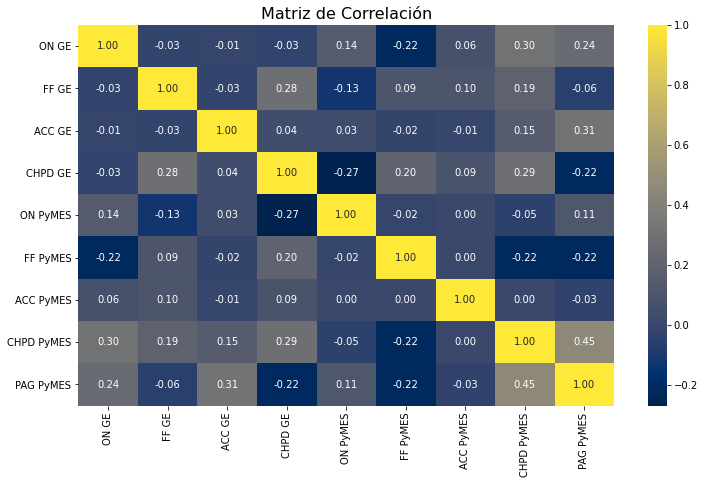

In [18]:
Cormat = df.corr()
Cormat

f, ax = plt.subplots(figsize=(12,7))
sns.heatmap(Cormat, vmax=1, square=False, annot=True, fmt=".2f", cmap="cividis")
plt.title("Matriz de Correlación", fontsize=16)

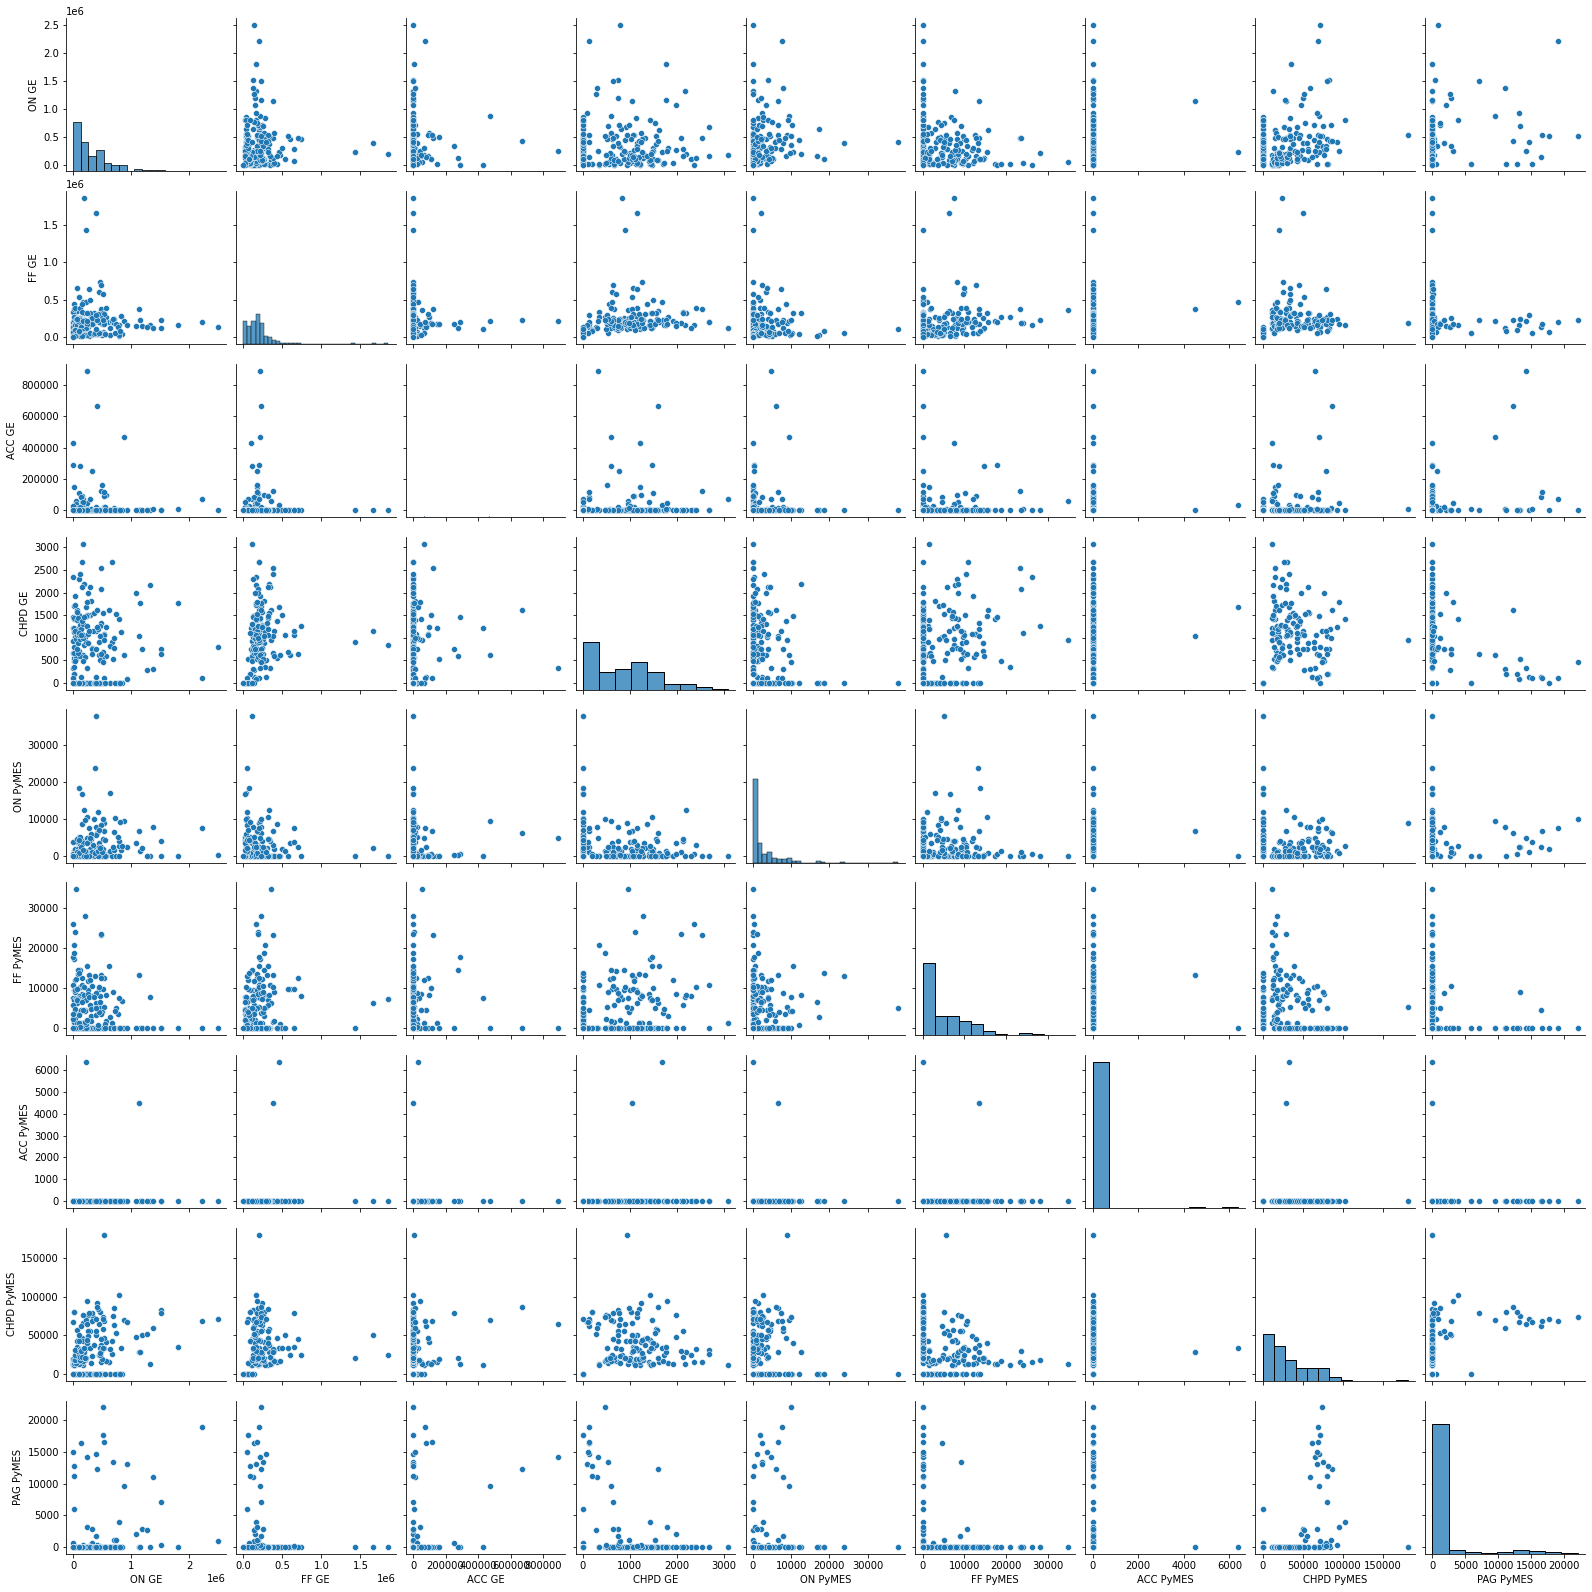

In [19]:
cols = ["ON GE", "FF GE", "ACC GE", "CHPD GE", "ON PyMES", "FF PyMES", "ACC PyMES", "CHPD PyMES", "PAG PyMES"]

sns.pairplot(df[cols], height=2.5, palette="magma")
plt.show()